In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.stats import norm

In [2]:
###########TASK 1 #################

In [3]:
_range3 = np.arange(3)


def build_kernel_matrix(field, source, spread, viscosity, out=None):
    """
    Build a kernel matrix for the method of regularized Stokeslets.
    The blob function is predetermined.
    Parameters
    ----------
    field : (M, 3) ndarray
        The points we will be evaluating at.
    source : (N, 3) ndarray
        The locations of the point forces.
    viscosity : float
        The viscosity of the fluid.
    spread : array_like
        The spreading parameter for each point in `field`. Must be
        broadcastable to (M,).
    out : (3M, 3N) ndarray, optional
        Where to store the results.
    Returns
    -------
    out : (3M, 3N) ndarray
        The kernel matrix.
    """

    m = field.shape[0]
    n= source.shape[0]
    spread_sq = spread**2.0
    spread_sq_2 = 2.0*spread_sq
    if out is None:
        out = np.empty([3*m, 3*n])

    for i in range(n):
        diffs = field - source[i]
        r2 = np.einsum("ij, ij -> i", diffs, diffs)
        h2 = (r2 + spread_sq)**-1.5
        h1 = (r2 + spread_sq_2)*h2
        result = h2[:, np.newaxis] * np.einsum("ij, ik -> jik", diffs, diffs)
        result[_range3, :, _range3] += h1
        out[:, 3*i:3*i+3] = result.reshape((3*m, 3), order="F")

    out /= 8*np.pi*viscosity
    return out

In [4]:
xs = np.linspace(0.0, 0.0, 1)
ys = xs
zs = ys
xs, ys, zs = np.meshgrid(xs, ys, zs)
field = np.stack([xs.ravel(), ys.ravel(), zs.ravel()], axis=1) #making the point field
source = np.array([[0, 0, 0]]) #locations of the point force
epsilon = 0.1
viscosity = 1
print("xs: ", xs)
print("ys:", ys)
print("zs:", zs)
print("field:", field)
print("field's shape:",field.shape)
print("source: ", source)
print("source's shape:",source.shape)
M = build_kernel_matrix(field, source, epsilon, viscosity); M

xs:  [[[0.]]]
ys: [[[0.]]]
zs: [[[0.]]]
field: [[0. 0. 0.]]
field's shape: (1, 3)
source:  [[0 0 0]]
source's shape: (1, 3)


array([[0.79577472, 0.        , 0.        ],
       [0.        , 0.79577472, 0.        ],
       [0.        , 0.        , 0.79577472]])

In [5]:
def calcForce(M, U):
    M_inv = np.linalg.inv(M)
    F = np.matmul(M_inv, U)
    return F


In [6]:

U = np.array([0, 1, 0])  
Ms = [build_kernel_matrix(field, source, i/100, viscosity) for i in range(1, 11)] #different Ms based on different blob size
Fs = np.array([calcForce(i, U) for i in Ms]) #different calculated forces based on different blob(episilon) size
#print(Ms)
print("Forces:", Fs)

Forces: [[0.         0.12566371 0.        ]
 [0.         0.25132741 0.        ]
 [0.         0.37699112 0.        ]
 [0.         0.50265482 0.        ]
 [0.         0.62831853 0.        ]
 [0.         0.75398224 0.        ]
 [0.         0.87964594 0.        ]
 [0.         1.00530965 0.        ]
 [0.         1.13097336 0.        ]
 [0.         1.25663706 0.        ]]


In [7]:
eta = 1
ran = [i/100 for i in range(1,11)]
y = [6*np.pi*eta*r for r in ran]
Fs_ideal = [6*np.pi*eta*r*U for r in ran]
print("Fs_ideal:", Fs_ideal)

Fs_ideal: [array([0.        , 0.18849556, 0.        ]), array([0.        , 0.37699112, 0.        ]), array([0.        , 0.56548668, 0.        ]), array([0.        , 0.75398224, 0.        ]), array([0.       , 0.9424778, 0.       ]), array([0.        , 1.13097336, 0.        ]), array([0.        , 1.31946891, 0.        ]), array([0.        , 1.50796447, 0.        ]), array([0.        , 1.69646003, 0.        ]), array([0.        , 1.88495559, 0.        ])]


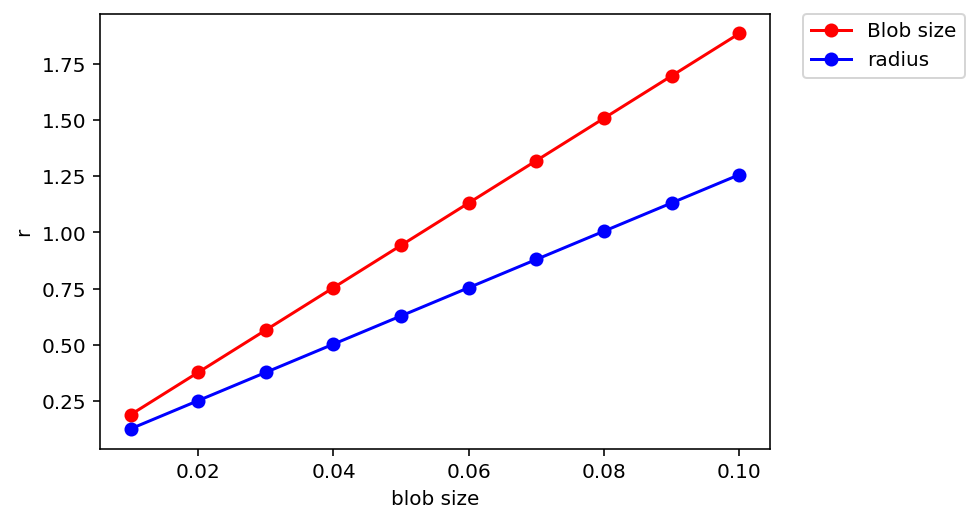

In [8]:
def drawGraph(x, y, y_actual, dimension):
    fig, ax = plt.subplots()
    ax.plot(x,np.array(y)[:, dimension],marker='o', color='r',label="Blob size")
    #ax.plot(x,y,marker='o', color='r')
    ax.plot(x,np.array(y_actual)[:, dimension],marker='o', color='b', label = "radius")
    ax.set_xlabel('blob size', fontsize='medium')
    ax.set_ylabel('r', fontsize='medium')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.draw()
drawGraph(ran, Fs_ideal, Fs, 1) #y

In [9]:
F = 1
r = 1 /(6*np.pi*eta*1)

m2 = (Fs[1]-Fs[0])/(ran[1]-ran[0]); m2[1]
print(m2[1])
blob = F/m2[1]; blob
blob/r

12.566370614359172


1.5

In [10]:
# Slope between theoratical and actual
m = (np.array(Fs_ideal)[:, 1][1]-np.array(Fs_ideal)[:, 1][0])/(np.array(Fs)[:, 1][1]-np.array(Fs)[:, 1][0])
print('Slope coefficient between theoratical and actual: ', m)

Slope coefficient between theoratical and actual:  1.5


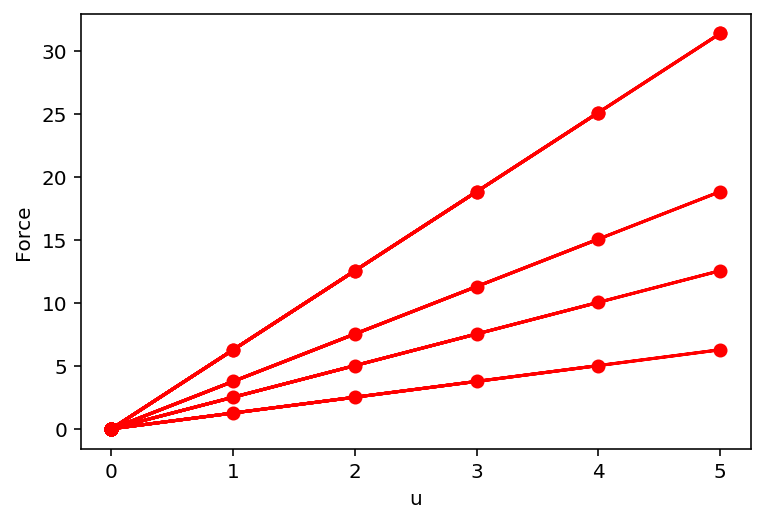

In [11]:
def drawF_U_blob_size(field, source, Us, blobs): 
    fig, ax = plt.subplots()
    for blob in blobs:
        for U in Us:
            ax.plot(U, calcForce(build_kernel_matrix(field, source, blob, 1), U), marker='o', color='r' )
    ax.set_xlabel('u', fontsize='medium')
    ax.set_ylabel('Force', fontsize='medium')
    '''for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    '''
    plt.draw()
    
drawF_U_blob_size(field, source, [[0,1,0],[0,2,0],[0,3,0],[0,4,0],[0,5,0]], [0.1, 0.2, 0.3, 0.5, 0.5])

In [12]:
#Task 1: Modified

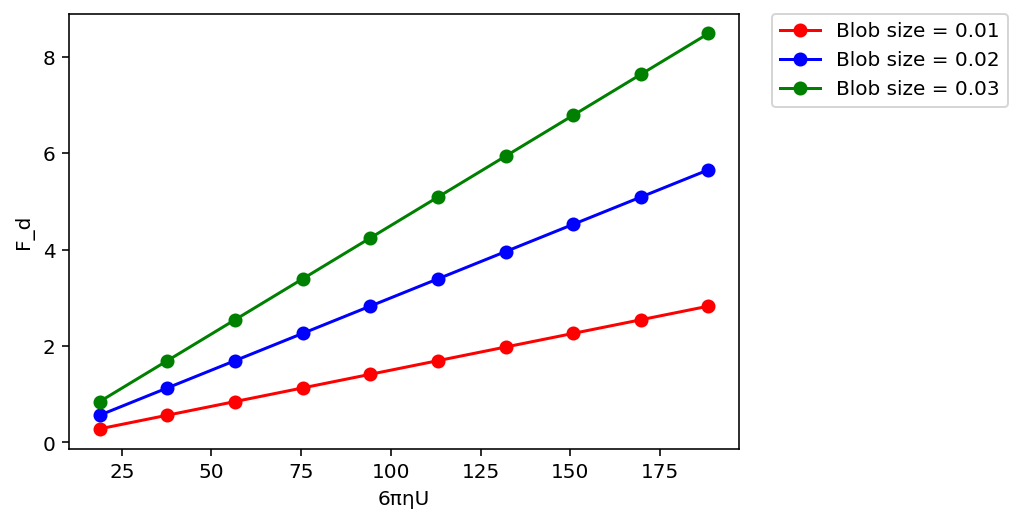

In [13]:
six_pi_eta_U = np.array([6*np.pi*eta*U for U in [1,2,3,4,5, 6, 7, 8, 9, 10]])
rs = np.array([i/100 for i in range(1,4)])*1.5
Fs_new = np.array([np.array([6*np.pi*eta*r_i*U for U in [1,2,3,4,5, 6, 7, 8, 9, 10]]) for r_i in rs])
#print(six_pi_eta_U)
#print(rs)
#print(Fs_new)
color_scheme = ['r', 'b', 'g']
def drawGraph_ver2(x, ys, colors, legends):
    fig, ax = plt.subplots()
    for i in range(len(ys)):
        ax.plot(x, ys[i], marker='o', color = colors[i], label=legends[i])
    ax.set_xlabel('6πηU', fontsize='medium')
    ax.set_ylabel('F_d', fontsize='medium')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.draw()
drawGraph_ver2(six_pi_eta_U, Fs_new, color_scheme, ['Blob size = 0.01','Blob size = 0.02', 'Blob size = 0.03' ]) #y

In [14]:
###########TASK 2 #################

In [15]:
from math import sqrt, pow
def probDensity(D, t, x):
    coef  = 1/sqrt(pow(4*np.pi*D*t, 3))
    e_pow = -(x*x)/(4*D*t)
    return coef*np.exp(e_pow)

In [16]:
D = 0.5
sim_xs = np.linspace(-2, 2, 11)
print(sim_xs.shape)
print(sim_xs)
sim_ys = sim_xs
sim_zs = sim_ys
sim_xs, sim_ys, sim_zs = np.meshgrid(sim_xs, sim_ys, sim_zs)
sim_field = np.stack([sim_xs.ravel(), sim_ys.ravel(), sim_zs.ravel()], axis=1)
print(len(sim_field))
sim_source = np.array([[0.0, 0.0, 0.0]])
sim_epsilon = 0.1
sim_viscosity = 1
sim_M = build_kernel_matrix(sim_field, sim_field, sim_epsilon, sim_viscosity)
print('M shape: ', sim_M.shape)
print(sim_M)

(11,)
[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
1331


M shape:  (3993, 3993)
[[0.79577472 0.         0.         ... 0.00765735 0.00191374 0.00191374]
 [0.         0.79577472 0.         ... 0.00191374 0.00765735 0.00191374]
 [0.         0.         0.79577472 ... 0.00191374 0.00191374 0.00765735]
 ...
 [0.00765735 0.00191374 0.00191374 ... 0.79577472 0.         0.        ]
 [0.00191374 0.00765735 0.00191374 ... 0.         0.79577472 0.        ]
 [0.00191374 0.00191374 0.00765735 ... 0.         0.         0.79577472]]


In [17]:
base_force = np.array([0.        , 1.88495559, 0.        ]) #With a blob size of 0.1
baseForce = np.array([base_force]).T
print(baseForce.shape)
baseForce


(3, 1)


array([[0.        ],
       [1.88495559],
       [0.        ]])

In [18]:
#Getting C for the random force

In [19]:
k_b = 1.38064852*10**(-23) #Boltzmann's constant
T   = 297.15 # absolute temperature
m = 10**(-12) # mass of one E coli cell in grams

C = 2*eta/(m*m)*k_b*T 

In [20]:
def randForce():
    return np.array([random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)])
randForce()

array([-0.59451623,  0.80855799,  0.79429347])

In [21]:
print(len(field))
randForces = np.array([randForce() for i in range(0, len(field))])
randForces.reshape(1,3)

1


array([[ 0.42299431, -0.04294186, -0.58022062]])

In [22]:
print(np.array([randForce()]).reshape(3,1))

[[ 0.78077469]
 [ 0.22704764]
 [-0.10829241]]


In [23]:
sz = sim_M.shape[0]
F= np.array([[-1.5*baseForce+np.array([randForce()]).reshape(3,1) for i in range(0, 1331)]]).reshape(3993,1)
print('F shape: ', F.shape)
F

F shape:  (3993, 1)


array([[ 0.39547662],
       [-2.98660747],
       [-0.63244874],
       ...,
       [-0.28443156],
       [-3.53219373],
       [ 0.94414865]])

In [24]:
print('M shape: ', sim_M.shape)
print('F shape:' , F.shape)
Velo = sim_M @ F
print('U shape: ', Velo.shape)
print(sim_field, sim_field.shape)
print(Velo.reshape(1331,3), Velo.reshape(1331,3).shape)

M shape:  (3993, 3993)
F shape: (3993, 1)
U shape:  (3993, 1)
[[-2.  -2.  -2. ]
 [-2.  -2.  -1.6]
 [-2.  -2.  -1.2]
 ...
 [ 2.   2.   1.2]
 [ 2.   2.   1.6]
 [ 2.   2.   2. ]] (1331, 3)
[[ -8.33379777 -62.16493464  -8.5001314 ]
 [-10.16859623 -67.29059988  -6.22522711]
 [-10.8785949  -70.26025017  -4.66757487]
 ...
 [-10.46103563 -71.9128988   -6.04623169]
 [ -9.88270976 -68.43470196  -7.62703996]
 [ -8.94170509 -63.12559684  -7.88639057]] (1331, 3)


In [25]:
def brownian_motion_simulation(field, M, force, time):
    velocity = (M @ force).reshape(field.shape)
    return field+velocity*time


In [26]:
def brownian_simulator(field, M, force, epsilon, viscosity, ts, axis):
    prev_field = field
    locations = []
    for t in ts:
        newM = build_kernel_matrix(prev_field, prev_field, epsilon, viscosity)
        newField= brownian_motion_simulation(prev_field, newM, force, t)
        locations.append(newField[:, axis])
        prev_field = newField
    return locations


In [27]:

print(brownian_simulator)
locations = brownian_motion_simulation(sim_field, sim_M, F, 1)
xs = locations[:,0]
ys = locations[:, 1]
print(ys)
print(len(ys))

<function brownian_simulator at 0x7f0b48b5fd08>
[-64.16493464 -69.29059988 -72.26025017 ... -69.9128988  -66.43470196
 -61.12559684]
1331


In [28]:
#time_ys = [brownian_motion_simulation(sim_field, sim_M, F, t)[:,1] for t in range(1, 6)]
time_ys = brownian_simulator(sim_field, sim_M, F, 0.1, 1, [t for t in range(1,6)], 1)
time_ys

[array([-64.16493464, -69.29059988, -72.26025017, ..., -69.9128988 ,
        -66.43470196, -61.12559684]),
 array([-86.86781085, -93.89540542, -96.2535196 , ..., -99.83720761,
        -95.06290396, -86.90465065]),
 array([-115.33161662, -126.61370022, -127.89011993, ..., -140.1167521 ,
        -132.24645449, -119.05633666]),
 array([-144.92001551, -162.65033689, -161.53971523, ..., -185.43742558,
        -173.07211699, -153.78624963]),
 array([-174.57442883, -199.38744706, -194.01764062, ..., -231.62518933,
        -214.81921868, -190.1000051 ])]

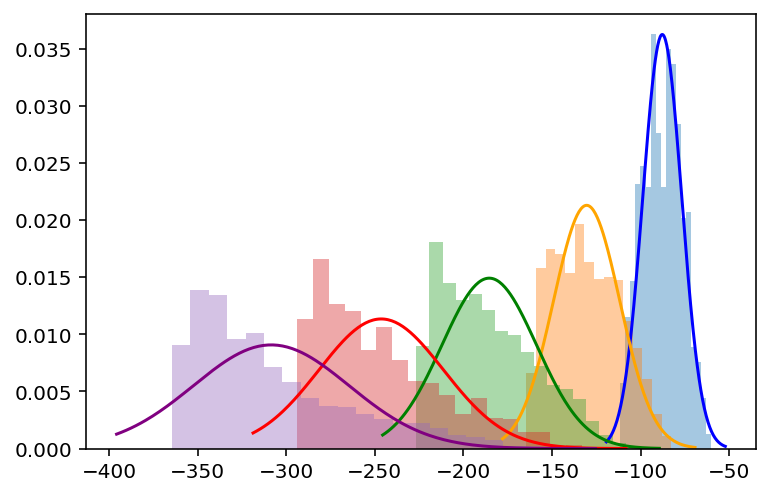

In [29]:
sns.distplot(time_ys[0],fit=norm, kde=False, fit_kws={"color":"blue"})
sns.distplot(time_ys[1],fit=norm, kde=False,fit_kws={"color":"orange"})
sns.distplot(time_ys[2],fit=norm, kde=False,fit_kws={"color":"green"})
sns.distplot(time_ys[3],fit=norm, kde=False,fit_kws={"color":"red"})
sns.distplot(time_ys[4],fit=norm, kde=False, fit_kws={"color":"purple"})

In [30]:
rand_F= np.array([[np.array([randForce()]).reshape(3,1) for i in range(0, 1331)]]).reshape(3993,1)
rand_F

array([[ 0.67344581],
       [-0.01936971],
       [ 0.47238827],
       ...,
       [-0.33417319],
       [ 0.01160911],
       [ 0.26066719]])

In [31]:
rand_time_ys = [brownian_motion_simulation(sim_field, sim_M, rand_F, t/10)[:,1] for t in range(1, 51)]
rand_time_ys

[array([-1.99885218, -2.01212072, -2.00517844, ...,  1.98640603,
         2.01905665,  1.97740661]),
 array([-1.99770436, -2.02424145, -2.01035687, ...,  1.97281207,
         2.03811329,  1.95481321]),
 array([-1.99655654, -2.03636217, -2.01553531, ...,  1.9592181 ,
         2.05716994,  1.93221982]),
 array([-1.99540872, -2.0484829 , -2.02071374, ...,  1.94562413,
         2.07622658,  1.90962642]),
 array([-1.9942609 , -2.06060362, -2.02589218, ...,  1.93203016,
         2.09528323,  1.88703303]),
 array([-1.99311309, -2.07272434, -2.03107061, ...,  1.9184362 ,
         2.11433987,  1.86443963]),
 array([-1.99196527, -2.08484507, -2.03624905, ...,  1.90484223,
         2.13339652,  1.84184624]),
 array([-1.99081745, -2.09696579, -2.04142749, ...,  1.89124826,
         2.15245316,  1.81925284]),
 array([-1.98966963, -2.10908651, -2.04660592, ...,  1.87765429,
         2.17150981,  1.79665945]),
 array([-1.98852181, -2.12120724, -2.05178436, ...,  1.86406033,
         2.19056645,  1.77

IndexError: list index out of range

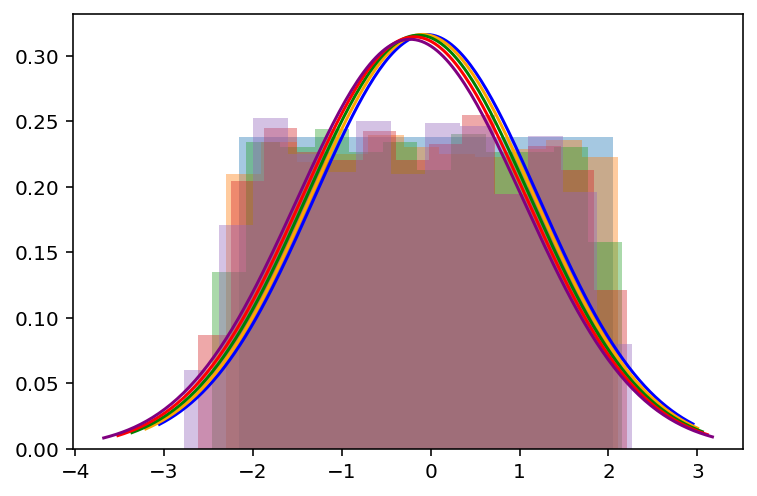

In [32]:
displot_colors = ["blue", 'orange', 'green', 'red', 'purple']
for i in range(len(rand_time_ys)):
    sns.distplot(rand_time_ys[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})

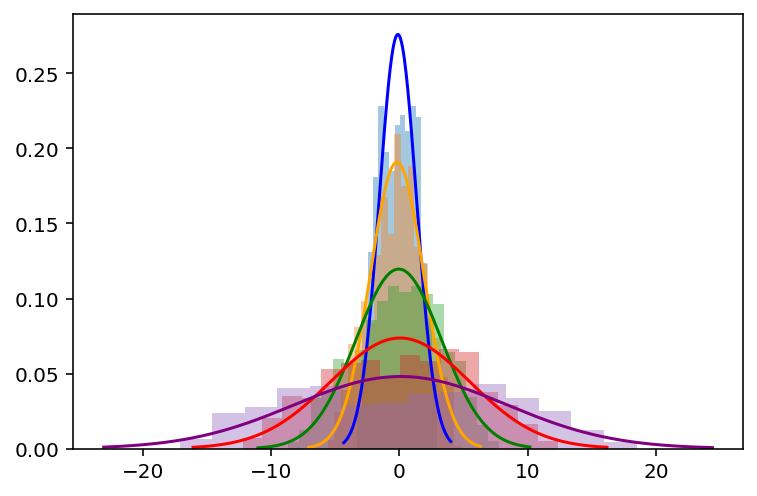

In [33]:
# Changing random force through time with N_particles
iters = 5 #numbers of iterations we consider
list_rand_time_ys = [] #different phases of the time series each with its own random force
for i in range(5): 
    rand_force = np.array([[np.array([randForce()]).reshape(3,1) for i in range(0, 1331)]]).reshape(3993,1)
    list_rand_time_ys.append(brownian_simulator(sim_field, sim_M, rand_force, 0.1, 1, [t for t in range(1,6)], 1))


for j in range(len(list_rand_time_ys[0])):
    sns.distplot(list_rand_time_ys[0][j], fit=norm, kde=False, fit_kws={"color": displot_colors[j]})

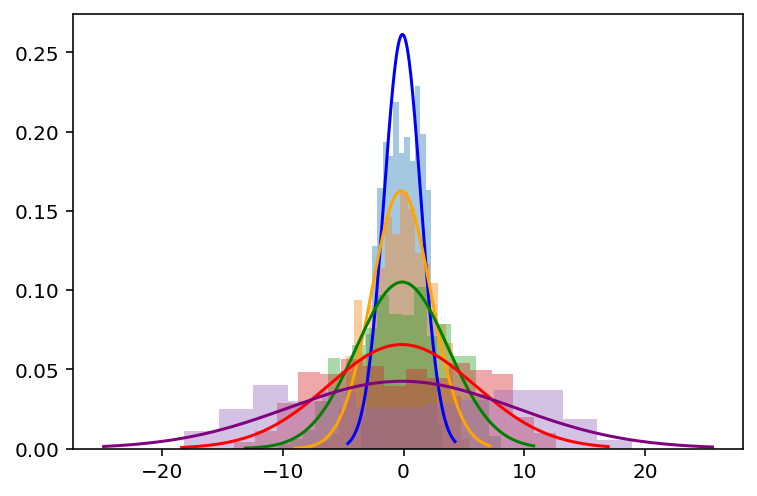

In [34]:
for j in range(len(list_rand_time_ys[1])):
    sns.distplot(list_rand_time_ys[1][j], fit=norm, kde=False, fit_kws={"color": displot_colors[j]})

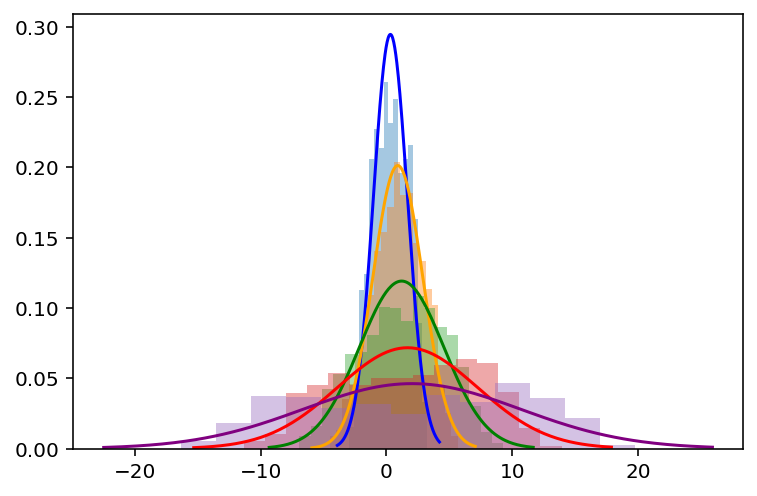

In [35]:
for j in range(len(list_rand_time_ys[2])):
    sns.distplot(list_rand_time_ys[2][j], fit=norm, kde=False, fit_kws={"color": displot_colors[j]})

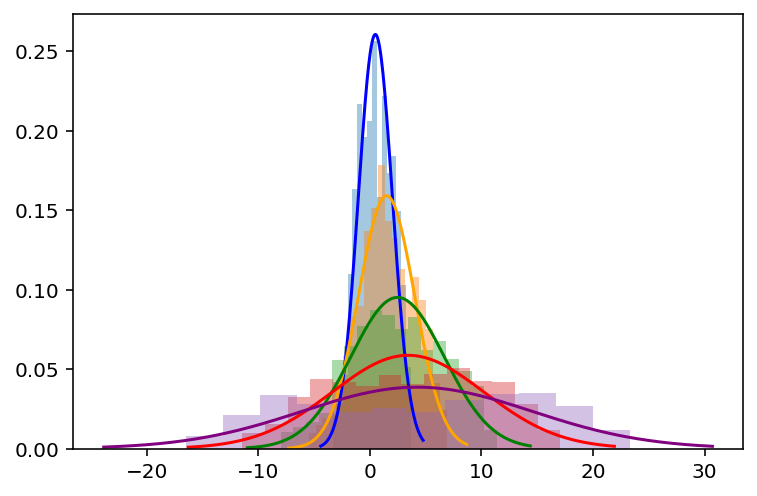

In [36]:
for j in range(len(list_rand_time_ys[3])):
    sns.distplot(list_rand_time_ys[3][j], fit=norm, kde=False, fit_kws={"color": displot_colors[j]})

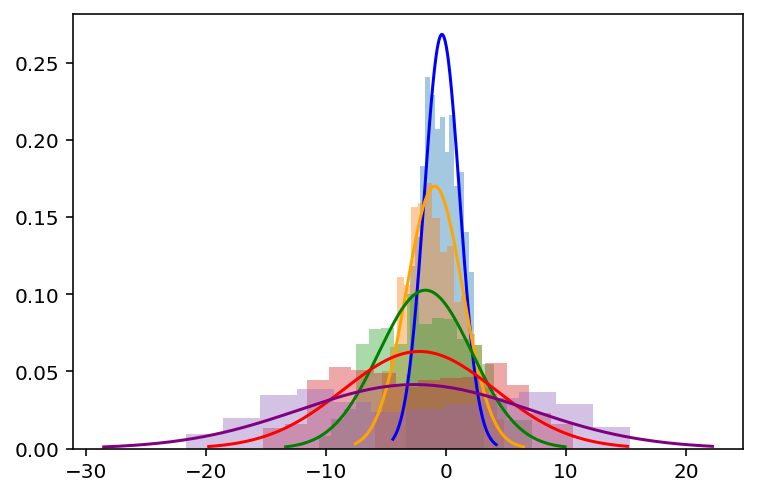

In [37]:
for j in range(len(list_rand_time_ys[4])):
    sns.distplot(list_rand_time_ys[4][j], fit=norm, kde=False, fit_kws={"color": displot_colors[j]})

In [203]:
#Brownian motion of a single point
def single_point_simulation():
    locs = []
    for i in range(iters):
        rand_force_sp = randForce().reshape(3,1)
        locs = brownian_simulator(field, M, rand_force_sp/10, 0.1, 1,[t/10 for t in range(51)], 0)
        #for j in range(iters):
        #   locs.append(brownian_motion_simulation(field, M, rand_force_sp, j)[:, 1])
    y_sp = np.array(list(map(lambda x: x[0], locs)))
    x_sp = np.array([i for i in range(1,26)])
    ro = y_sp[0] #r_0, starting position
    #return y_sp
    return [y_sp[10]-ro, y_sp[20]-ro, y_sp[30]-ro, y_sp[40]-ro, y_sp[50]-ro]

In [205]:
single_point_simulation()

[0.22098009078438427,
 0.8437421648131035,
 1.8682862220861578,
 3.2946122626035463,
 5.122720286365271]

In [206]:
positions_sp = []
for i in range(1332):
    positions_sp.append(single_point_simulation())
    
n_runs_position = [[p[j] for p in positions_sp] for j in range(5)]


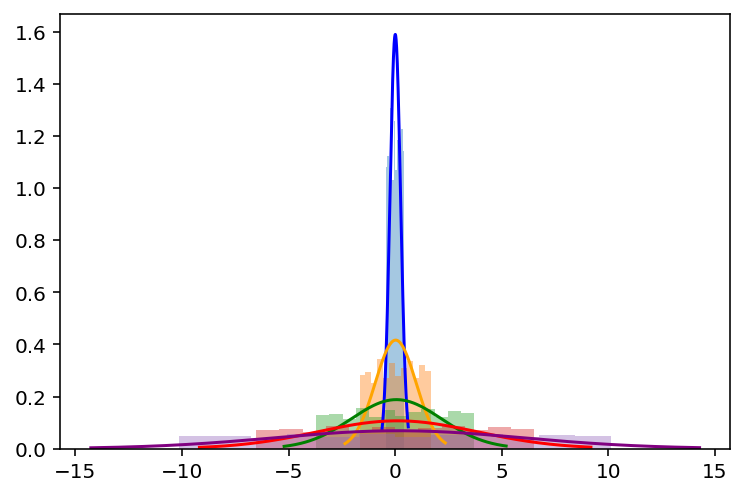

In [207]:
for i in range(5):
    sns.distplot(n_runs_position[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})

In [42]:
def _compute_stuff(r, d2):

    r2 = np.einsum("ij, ij -> i", r, r)
    r2_1_2 = np.sqrt(r2)
    r2d2 = r2 + d2
    r2d2_1_2 = np.sqrt(r2d2)
    r2d2_3_2 = r2d2**(3.0/2.0)
    r2d2_5_2 = r2d2**(5.0/2.0)

    H1 = 1.0/r2d2_1_2 + d2/r2d2_3_2
    H2 = 1.0/r2d2_3_2
    D1 = 2.0/r2d2_3_2 - (6.0*d2)/r2d2_5_2
    D2 = -6.0/r2d2_5_2
    H1p = (-r2_1_2/r2d2_3_2) - ((3.0*d2*r2_1_2)/r2d2_5_2)
    H2p = (-3.0*r2_1_2) / r2d2_5_2

    return (H1, H2, D1, D2, H1p, H2p, r2_1_2)


def build_image_kernel_matrix(field,source,spread,viscosity,wall,out=None):
    """
    Build a kernel matrix for the image method.
    The blob function is predetermined.
    Parameters
    ----------
    field : (M, 3) ndarray of float
        The points we will be evaluating at.
    source : (N, 3) ndarray of float
        The locations of the point forces.
    viscosity : float
        The viscosity of the fluid.
    spread : array_like
        The spreading parameter for each point in `field`. Must be
        broadcastable to (M,).
    wall : float
        x-coordinate of a wall parallel to the yz-plane.
    out : (3M, 3N) ndarray of float, optional
        Where to store the results.
    Returns
    -------
    out : (3M, 3N) ndarray of float
        The kernel matrix.
    """

    ax = 0
    m, _ = field.shape
    n, _ = source.shape
    spread_sq = spread**2
    if out is None:
        out = np.empty([3*m, 3*n])
    range_1_3 = np.arange(1, 3)
    range_3 = np.arange(3)

    for i in range(0, n):

        h = source[i, ax] - wall
        h_sq = h**2

        # Set up main points.

        rs = field - source[i]
        (H1, H2, _, _, _, _, _) = _compute_stuff(rs, spread_sq)

        # Set up image points.

        rs_im = rs.copy()
        rs_im[:, ax] = field[:, ax] - 2*wall + source[i, ax]
        (H1_im, H2_im, D1_im, D2_im, H1p_im, H2p_im, r2_im_sqrt) = (
            _compute_stuff(rs_im, spread_sq)
        )

        # Preliminary computations and preparation.

        stuff = np.einsum("ij, ik -> jik", rs, rs)
        stuff_im = np.einsum("ij, ik -> jik", rs_im, rs_im)

        pattern1 = np.array([1, -1, -1])
        pattern2 = np.array([0, 1, 1])
        result = np.zeros([3, n, 3])

        # Block stuff.

        # f*H1(x*)
        result[range_3, :, range_3] += H1
        # (f dot x*)*(x*)*H2(x*)
        result += H2[np.newaxis, :, np.newaxis] * stuff
        # -f*H1(x)
        result[range_3, :, range_3] -= H1_im
        # -(f dot x)*x*H2(x)
        result -= H2_im[np.newaxis, :, np.newaxis] * stuff_im
        # -(h^2)*g*D1(x)
        result[range_3, :, range_3] -= (
            pattern1[:, np.newaxis] * h_sq * D1_im[np.newaxis, :]
        )
        # -(h^2)*(g dot x)*x*D2(x)
        result -= (
            pattern1[np.newaxis, np.newaxis, :] * h_sq *
            stuff_im * D2_im[np.newaxis, :, np.newaxis]
        )
        # (2*h*H1'(x)/|x|)(L cross x)
        result[0, :, :] += (
            pattern2[np.newaxis, :] * 2 * h * H1p_im[:, np.newaxis] * rs_im
            / r2_im_sqrt[:, np.newaxis]
        )
        result[range_1_3, :, range_1_3] -= (
            2 * h * rs_im[:, 0] * H1p_im / r2_im_sqrt
        )[np.newaxis, :]
        # (2*h*H2(x))(L cross x)
        result[0, :, :] += (
            pattern2[np.newaxis, :] * 2 * h * H2_im[:, np.newaxis] * rs_im
        )
        result[range_1_3, :, range_1_3] -= (
            2 * h * H2_im * rs_im[:, 0]
        )[np.newaxis, :]
        # 2*h*(g dot e1)*x*H2(x)
        result[:, :, 0] += 2 * h * H2_im[np.newaxis, :] * rs_im.T
        # 2*h*(x dot e1)*g*H2(x)
        result[range_3, :, range_3] += (
            pattern1[:, np.newaxis] * 2 * h * rs_im[np.newaxis, :, 0] *
            H2_im[np.newaxis, :]
        )
        # 2*h*(g dot x)*e1*H1'(x)/|x|
        result[0, :, :] += (
            pattern1[np.newaxis, :] * 2 * h * rs_im * H1p_im[:, np.newaxis] /
            r2_im_sqrt[:, np.newaxis]
        )
        # (x dot e1)*(g dot x)*x*H2'(x)/|x|
        result += (
            pattern1[np.newaxis, np.newaxis, :] * 2 * h *
            H2p_im[np.newaxis, :, np.newaxis] *
            rs_im[np.newaxis, :, 0, np.newaxis] * stuff_im /
            r2_im_sqrt[np.newaxis, :, np.newaxis]
        )
        # Done.
        out[:, 3*i:3*i+3] = result.reshape(3*n, 3, order="F")

    out /= 8*np.pi*viscosity
    return out

In [43]:
'''
sim_xs = np.linspace(-2, 2, 11)
print(sim_xs.shape)
print(sim_xs)
sim_ys = sim_xs
sim_zs = sim_ys
sim_xs, sim_ys, sim_zs = np.meshgrid(sim_xs, sim_ys, sim_zs)
sim_field = np.stack([sim_xs.ravel(), sim_ys.ravel(), sim_zs.ravel()], axis=1)
print(len(sim_field))
sim_source = np.array([[0.0, 0.0, 0.0]])
sim_epsilon = 0.1
sim_viscosity = 1
sim_M = build_kernel_matrix(sim_field, sim_field, sim_epsilon, sim_viscosity)
print('M shape: ', sim_M.shape)
print(sim_M)
'''
#build_image_kernel_matrix(field,source,spread,viscosity,wall)
M_image = build_image_kernel_matrix(sim_field, sim_field, sim_epsilon, sim_viscosity, -2.5)
print(M_image)

[[ 6.77392893e-01  0.00000000e+00  0.00000000e+00 ... -5.56000257e-05
  -2.98217745e-06 -2.98217745e-06]
 [ 0.00000000e+00  7.36773979e-01  0.00000000e+00 ...  8.72558439e-04
   8.42266876e-04  7.85004377e-04]
 [ 0.00000000e+00  0.00000000e+00  7.36773979e-01 ...  8.72558439e-04
   7.85004377e-04  8.42266876e-04]
 ...
 [-5.56000257e-05  8.72558439e-04  8.72558439e-04 ...  7.82513168e-01
   0.00000000e+00  0.00000000e+00]
 [-2.98217745e-06  8.42266876e-04  7.85004377e-04 ...  0.00000000e+00
   7.89144214e-01  0.00000000e+00]
 [-2.98217745e-06  7.85004377e-04  8.42266876e-04 ...  0.00000000e+00
   0.00000000e+00  7.89144214e-01]]


In [44]:
def brownian_simulator_withWall(field, M, force, epsilon, viscosity, ts, axis):
    prev_field = field
    locations = []
    for t in ts:
        newM = build_image_kernel_matrix(prev_field, prev_field, epsilon, viscosity, -2.5)
        newField= brownian_motion_simulation(prev_field, newM, force, t)
        locations.append(newField[:, axis])
        prev_field = newField
    return locations


In [45]:
print(rand_F)
#rand_time_ys = [brownian_motion_simulation(sim_field, sim_M, rand_F, t)[:,1] for t in range(1, 6)]
rand_xs = brownian_simulator(sim_field, sim_M, rand_F, 0.1, 1, [t/10 for t in range(1,51)], 0) #[brownian_motion_simulation(sim_field, sim_M, rand_F, t/10)[:,0] for t in range(1, 51)]
rand_xs_with_wall = brownian_simulator_withWall(sim_field, sim_M, rand_F, 0.1, 1, [t/10 for t in range(1,51)], 0)#[brownian_motion_simulation(sim_field, M_image, rand_F, t/10)[:,0] for t in range(1, 51)]

[[ 0.67344581]
 [-0.01936971]
 [ 0.47238827]
 ...
 [-0.33417319]
 [ 0.01160911]
 [ 0.26066719]]


In [46]:
print(len(rand_xs_with_wall))

50


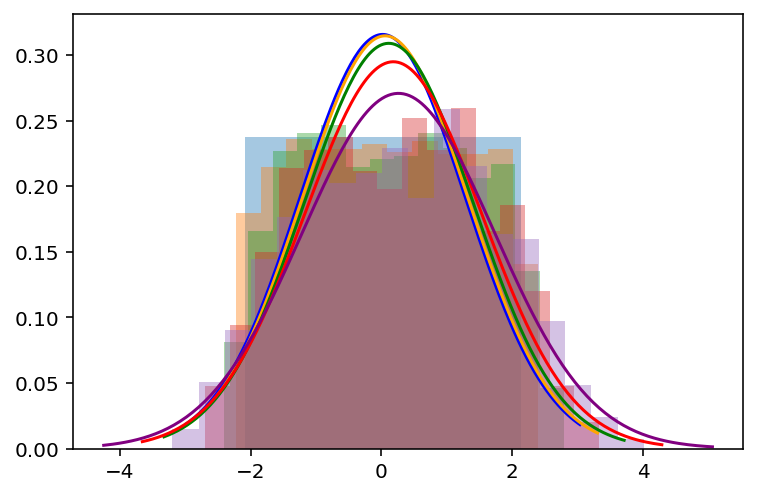

In [47]:
for i in range(5): #without wall
    sns.distplot(rand_xs[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})

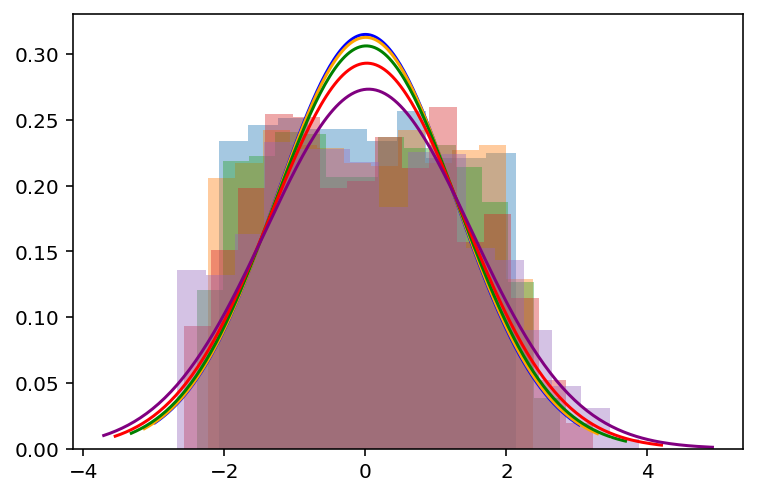

In [48]:
for i in range(5):
    sns.distplot(rand_xs_with_wall[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})

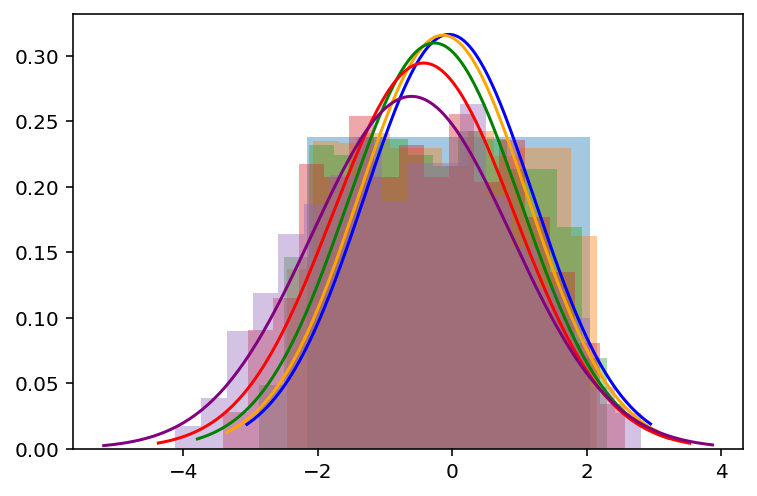

In [55]:
rand_ys = brownian_simulator(sim_field, sim_M, rand_F, 0.1, 1, [t/10 for t in range(1,51)], 1)
rand_ys = brownian_simulator(sim_field, sim_M, rand_F, 0.1, 1, [t/10 for t in range(1,51)], 1)
rand_ys_with_wall = brownian_simulator_withWall(sim_field, sim_M, rand_F, 0.1, 1, [t/10 for t in range(1,51)], 1)
for i in range(5):
    sns.distplot(rand_ys[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})


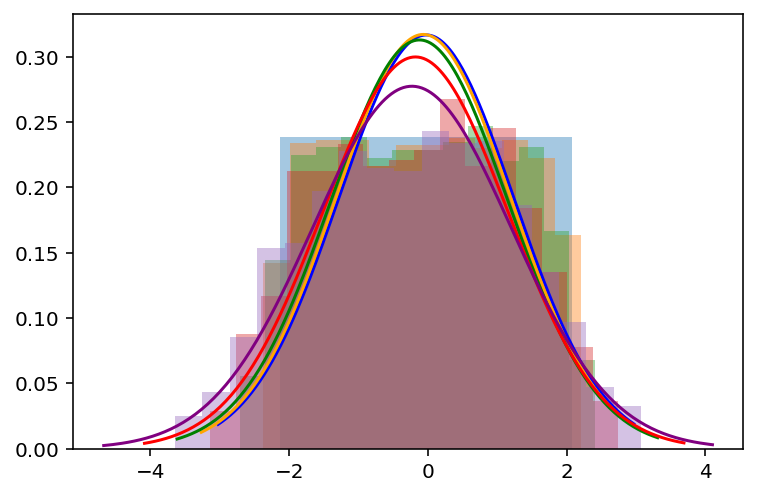

In [50]:
for i in range(5):
    sns.distplot(rand_ys_with_wall[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})

In [194]:
def brownian_simulator_withWall2(field, M, force, epsilon, viscosity, ts, axis):
    prev_field = field
    locations = []
    for t in ts:
        newM = build_image_kernel_matrix(prev_field, prev_field, epsilon, viscosity, -1)
        newField= brownian_motion_simulation(prev_field, newM, force, t)
        locations.append(newField[:, axis])
        prev_field = newField
    return locations


In [195]:
rand_force_sp = randForce().reshape(3,1)
brownian_simulator_withWall2(field, M, rand_force_sp/10, 0.1, 1,[t/10 for t in range(51)], 0)

[array([0.]),
 array([-0.00438746]),
 array([-0.01315927]),
 array([-0.02630752]),
 array([-0.04381918]),
 array([-0.06567552]),
 array([-0.09185129]),
 array([-0.12231344]),
 array([-0.15701942]),
 array([-0.19591476]),
 array([-0.23892958]),
 array([-0.28597366]),
 array([-0.33692921]),
 array([-0.39163993]),
 array([-0.44989417]),
 array([-0.51139791]),
 array([-0.57572963]),
 array([-0.64226139]),
 array([-0.7100137]),
 array([-0.77737497]),
 array([-0.8415454]),
 array([-0.89753936]),
 array([-0.9376382]),
 array([-0.95771664]),
 array([-0.96650802]),
 array([-0.97131045]),
 array([-0.97442058]),
 array([-0.97664892]),
 array([-0.9783516]),
 array([-0.97971128]),
 array([-0.98083229]),
 array([-0.98177909]),
 array([-0.98259396]),
 array([-0.98330594]),
 array([-0.98393575]),
 array([-0.98449862]),
 array([-0.98500605]),
 array([-0.98546692]),
 array([-0.98588818]),
 array([-0.98627542]),
 array([-0.98663315]),
 array([-0.98696505]),
 array([-0.98727421]),
 array([-0.98756318]),
 

In [215]:
def single_point_simulation_withWall():
    locs = []
    for i in range(iters):
        rand_force_sp = randForce().reshape(3,1)
        locs = brownian_simulator_withWall2(field, M, rand_force_sp/10, 0.1, 1,[t/10 for t in range(51)], 2)
        #for j in range(iters):
        #   locs.append(brownian_motion_simulation(field, M, rand_force_sp, j)[:, 1])
    y_sp = np.array(list(map(lambda x: x[0], locs)))
    x_sp = np.array([i for i in range(1,26)])
    ro = y_sp[0] #r_0, starting position
    #return y_sp
    return [y_sp[10]-ro, y_sp[20]-ro, y_sp[30]-ro, y_sp[40]-ro, y_sp[50]-ro]

In [217]:
print(field)
print()
single_point_simulation_withWall()

[[0. 0. 0.]]



[-0.35472489500882143,
 -1.119340276463608,
 -1.4032541830812728,
 -1.5983699379229537,
 -1.764142187176488]

In [218]:
positions_sp_withWall = []
for i in range(1332):
    positions_sp_withWall.append(single_point_simulation_withWall())
    
n_runs_position_withWall = [[p[j] for p in positions_sp_withWall] for j in range(5)]

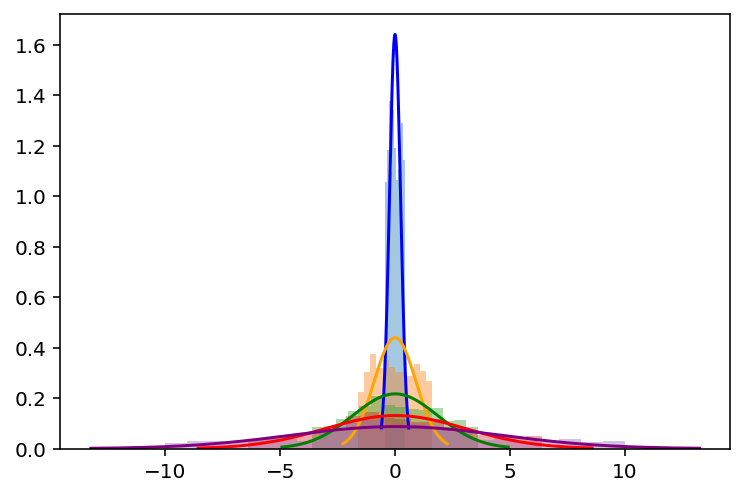

In [219]:
for i in range(5):
    sns.distplot(n_runs_position_withWall[i], fit=norm, kde=False, fit_kws={"color": displot_colors[i]})